Group 1 StoryTelling with Data CIS 9650
By Raphael Clifton, Sam Probber, Richard Bunnicelli, and Van Nguyen

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
from IPython.display import display, Image
import plotly.io as pio
import plotly_express as px

Loading and cleaning CUNY Data

In [2]:
#Loading data from apis

# City University of New York (CUNY) University Retention and Graduation Rates: Beginning 1990
# found at: https://data.ny.gov/Education/City-University-of-New-York-CUNY-University-Retent/ba86-tr5c
retention_response = requests.get('https://data.ny.gov/resource/ba86-tr5c.json')
retention_data = retention_response.text
retention__loaded = json.loads(retention_data)
retention_df = pd.json_normalize(retention__loaded)

# City University of New York (CUNY) University Enrollment Trends: Beginning Fall 1990
# found at: https://data.ny.gov/Education/City-University-of-New-York-CUNY-University-Enroll/366h-mnau
enrollment_response = requests.get('https://data.ny.gov/resource/366h-mnau.json')
enrollment_data = enrollment_response.text
enrollment_loaded = json.loads(enrollment_data)
enrollment_df = pd.json_normalize(enrollment_loaded)

# CUNY Employee Headcount by Function and Employment Status: Beginning 2009
# found at: https://data.ny.gov/Education/CUNY-Employee-Headcount-by-Function-and-Employment/95p4-ep6e
employee_response = requests.get('https://data.ny.gov/resource/95p4-ep6e.json')
employee_data = employee_response.text
employee_loaded = json.loads(employee_data)
employee_df = pd.json_normalize(employee_loaded)

# City University of New York (CUNY) University Degrees Granted per Degree Type: Beginning 1966
# found at: https://data.ny.gov/Education/City-University-of-New-York-CUNY-University-Degree/ybg5-afvs
degrees_response = requests.get('https://data.ny.gov/resource/ybg5-afvs.json')
degrees_data = degrees_response.text
degrees_loaded = json.loads(degrees_data)
degrees_df = pd.json_normalize(degrees_loaded)

# City University of New York (CUNY) Enrollment Trends by College: Beginning Fall 1990
# found at: https://data.ny.gov/Education/City-University-of-New-York-CUNY-Enrollment-Trends/487n-fp4r
college_enrollment_response = requests.get('https://data.ny.gov/resource/487n-fp4r.json')
college_enrollment_data = college_enrollment_response.text
college_enrollment_loaded = json.loads(college_enrollment_data)
college_enrollment_df = pd.json_normalize(college_enrollment_loaded)

In [3]:
#cleaning/formatting data, replacing string values to make them consistent
retention_df.fall_term = retention_df.fall_term.astype(str)
ret_fall_to_replace = ['Fall ','01-SEP-2018','01-SEP-2013','01-SEP-2016', '01-SEP-2017', '01-SEP-2015', '01-SEP-2014', '01-SEP-2012',
 '1-Sep-19', '1-Sep-14', '1-Sep-17']

ret_fall_val_replace =['','2018','2013','2016','2017','2015','2014','2012','2019','2014','2017']
retention_df['fall_term'] = retention_df['fall_term'].replace(ret_fall_to_replace, ret_fall_val_replace, regex=True)
retention_df['college'] = retention_df['college'].replace('CUNY ','', regex=True)
ret_int_cols = ['fall_term','record_type_code','head_count']
retention_df[ret_int_cols] = retention_df[ret_int_cols].astype(int)
retention_df.percentage = retention_df.percentage.astype(float)
retention_df['actual_count'] = retention_df.head_count * (retention_df.percentage/100)


enrollment_df['fall_term'] = enrollment_df['fall_term'].astype(str)
enrollment_df['fall_term'] = enrollment_df['fall_term'].str.replace('Fall ', '', regex=True)
en_df_to_int = ['fall_term','enrollment_type_code','head_count']
enrollment_df[en_df_to_int] = enrollment_df[en_df_to_int].astype(int)
enrollment_df['full_time_equivalent_fte_enrollment'] = enrollment_df['full_time_equivalent_fte_enrollment'].astype(float)

emp_float_cols = ['year', 'all_employees_total', 'all_employees_full_time', 'all_employees_part_time', 'faculty_total', 'faculty_full_time',
                'faculty_part_time', 'staff_total', 'staff_full_time', 'staff_part_time']
employee_df[emp_float_cols] = employee_df[emp_float_cols].astype(float)

degrees_df['degree_type'] = degrees_df['degree_type'].replace('\'', '', regex=True)
degrees_df['degree_type'] = degrees_df['degree_type'].replace('Master of Philosophy', 'MASTERS OF PHILOSOPHY', regex=True)
degrees_df['degree_type'] = degrees_df['degree_type'].replace('Masters', 'MASTERS', regex=True)
degrees_df['degree_type'] = degrees_df['degree_type'].replace('Associate', 'ASSOCIATE', regex=True)
degrees_df['degree_type'] = degrees_df['degree_type'].replace('Baccalaureate', 'BACHELORS', regex=True)
degrees_df['degree_type'] = degrees_df['degree_type'].replace('Advance Certificate', 'ADVANCED CERTIFICATE', regex=True)
degrees_df['degree_type'] = degrees_df['degree_type'].replace('Total', 'TOTAL', regex=True)
degrees_df['degree_type'] = degrees_df['degree_type'].replace('J.D.', 'JD', regex=True)
degrees_df['degree_type'] = degrees_df['degree_type'].replace('DOCTORAL', 'PhD', regex=True)
degrees_df['count'] = degrees_df['count'].astype(int)

college_enrollment_df['college_name'] = college_enrollment_df['college_name'].replace('CUNY ', '', regex=True)
college_enrollment_df['fall_term'] = college_enrollment_df['fall_term'].replace('Fall ', '', regex=True)
college_enrollment_df['fall_term'] = college_enrollment_df['fall_term'].astype(int)

demo_df[['Year','Enrollment']] = demo_df[['Year','Enrollment']].astype(int)

NameError: name 'demo_df' is not defined

In [ ]:
#adding some columns

#for a accaurate head count 
retention_df['amount retained or graduated'] = retention_df['head_count'] * (retention_df['percentage']/100)

#looping through academic year to make a coulm with only the fall start for that academic year
x = degrees_df['academic_year']
fall_start_lst = []
for row in x:
  y = str(row)
  row = y[0:4]
  fall_start_lst.append(row)
degrees_df['Fall_start'] = fall_start_lst
degrees_df['Fall_start'] = degrees_df['Fall_start'].astype(int)

In [ ]:
#dropping any duplicate rows
retention_df            = retention_df.drop_duplicates()
enrollment_df           = enrollment_df.drop_duplicates()
employee_df             = employee_df.drop_duplicates()
degrees_df              = degrees_df.drop_duplicates()
college_enrollment_df   = college_enrollment_df.drop_duplicates()

Here our graphs begin.

Our story Centers around two high school seniors(Anna Jay and Mary Ann) debating whether to go to college or not.  Mary Ann ahs decided to attend Baruch.  Anna Jay has yet to be persuaded to attend any CUNY.  Therefore, Mary Ann has done some research in an attempt to persuade her friend to go to college.  Below are her findings.


This first blaock of code renders intereactive plotly graphs.  However, those are not veiwable or useable in github. To use the interactive graphs please downlaod the code and try it out.  The following blocks of code render static plotly graphs so that you may preview the grphas on github.

In [ ]:
#Creating Graphs for Degrees Data
#Raphael
fig = px.bar(total_degrees.pivot(columns='degree_type', values='count').sum(), title='Degrees Granted by Type',).update_layout(
    xaxis_title="Acaademic Year", yaxis_title="Number of Degrees Granted", showlegend=False,plot_bgcolor='rgba(0,0,0,0)').update_xaxes(showgrid=False).update_yaxes(showgrid=False)
fig.show()
fig1 = px.bar(degrees_overtime.pivot(columns='degree_type', values='count'), title='Degrees Granted by Type',).update_layout(
    xaxis_title="Acaademic Year", yaxis_title="Number of Degrees Granted", legend_title='Degree Types',plot_bgcolor='rgba(0,0,0,0)').update_xaxes(showgrid=False).update_yaxes(showgrid=False)
fig1.show()
fig2 = px.line(degrees_overtime.pivot(columns='degree_type', values='count'), title='Degrees Granted by Type',).update_layout(
    xaxis_title="Acaademic Year", yaxis_title="Number of Degrees Granted", legend_title='Degree Types',plot_bgcolor='rgba(0,0,0,0)').update_xaxes(showgrid=False).update_yaxes(showgrid=False)
fig2.show()

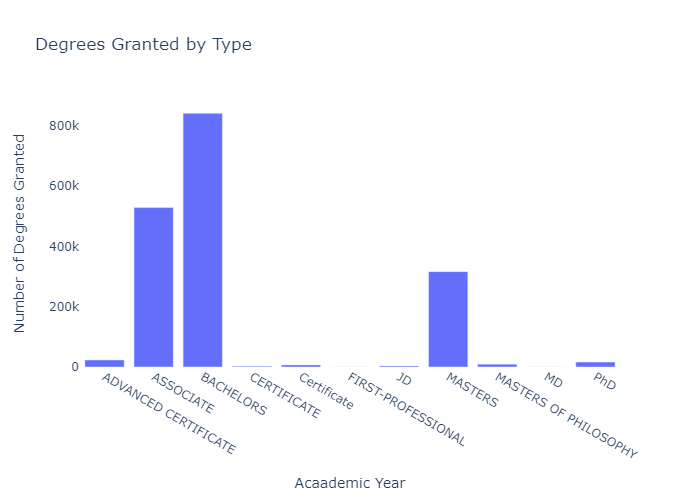

In [ ]:
#Raphael
Image(pio.to_image(fig,'png'))

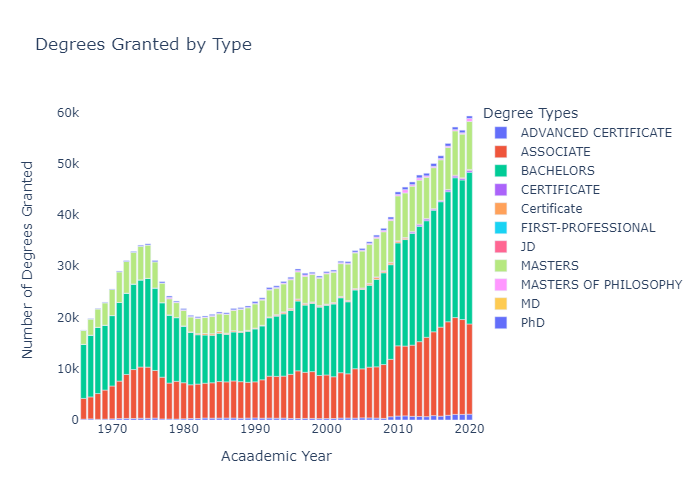

In [ ]:
#Raphael
Image(pio.to_image(fig1,'png'))

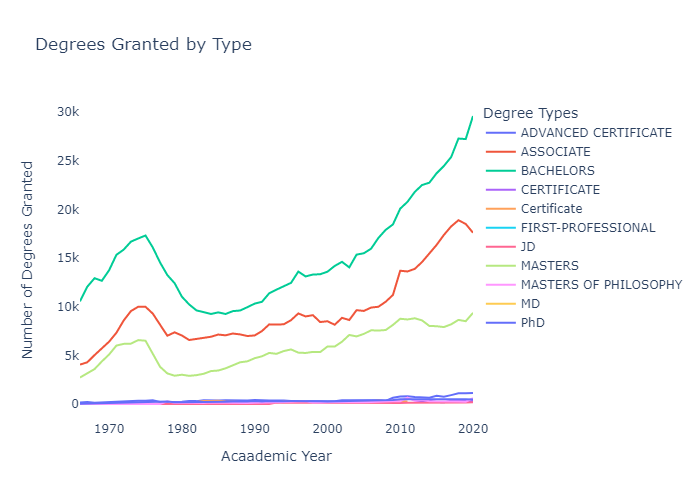

In [ ]:
#Raphael
Image(pio.to_image(fig2,'png'))

C:\Users\rapha\AppData\Local\Temp/ipykernel_18156/3170743098.py:16: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



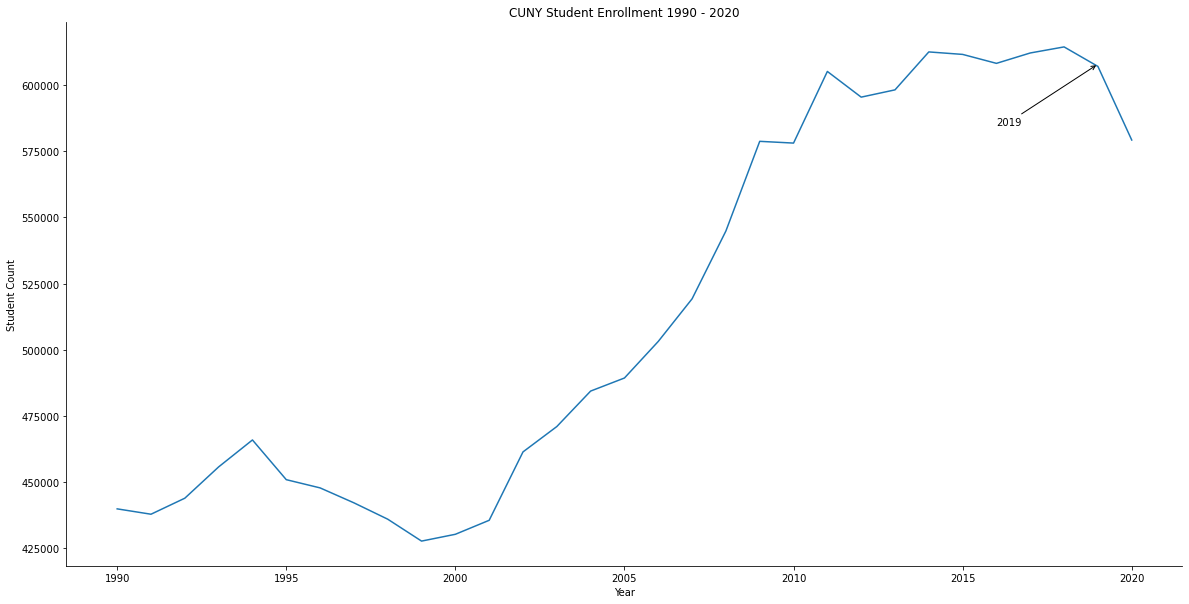

In [ ]:
#Van
#CUNY Enrollment Over Time
#Want to put in a stacked barchart, stacked by enrollment type but couldnt figure it out
enrollment = enrollment_df.groupby('fall_term')['head_count'].sum()

fig, ax = plt.subplots()

ax.plot(enrollment)

fig.set_size_inches(20,10)

ax.set(xlabel='Year', ylabel='Student Count',
       title='CUNY Student Enrollment 1990 - 2020')

# add annotation
plt.annotate(xy=[2019, 608000], xytext=[2016, 585000], s='2019', arrowprops = dict(arrowstyle="->"))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

C:\Users\rapha\AppData\Local\Temp/ipykernel_18156/392046352.py:16: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



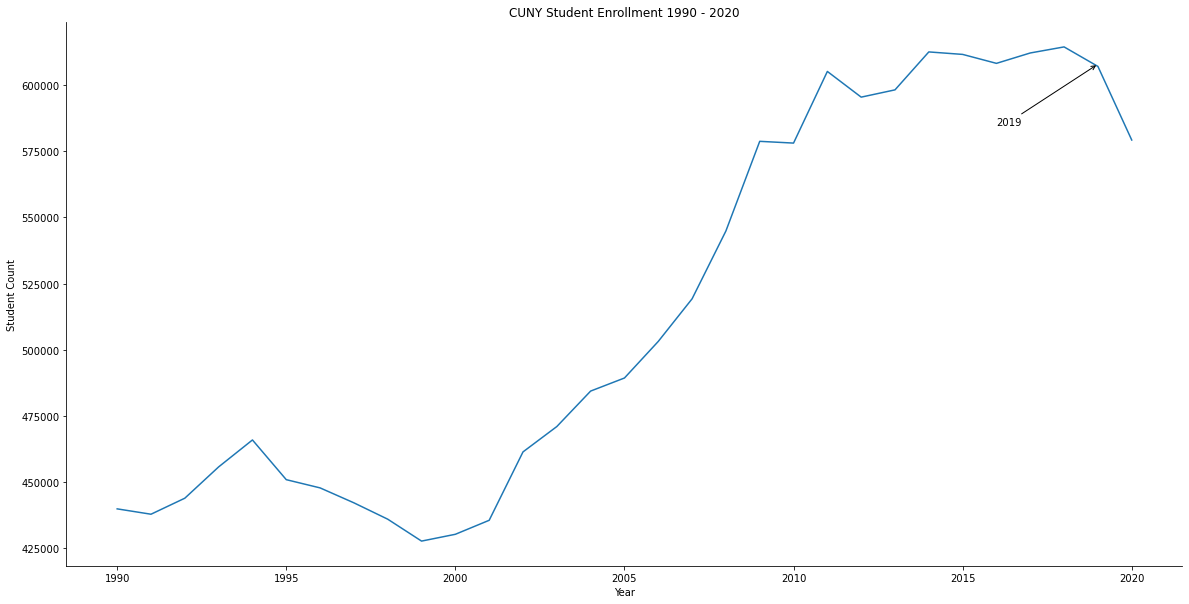

In [ ]:
#Van
#CUNY Enrollment Over Time
enrollment = enrollment_df.groupby('fall_term')['head_count'].sum()

fig, ax = plt.subplots()

ax.plot(enrollment)

fig.set_size_inches(20,10)

ax.set(xlabel='Year', ylabel='Student Count',
       title='CUNY Student Enrollment 1990 - 2020')

# add annotation
plt.annotate(xy=[2019, 608000], xytext=[2016, 585000], s='2019', arrowprops = dict(arrowstyle="->"))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


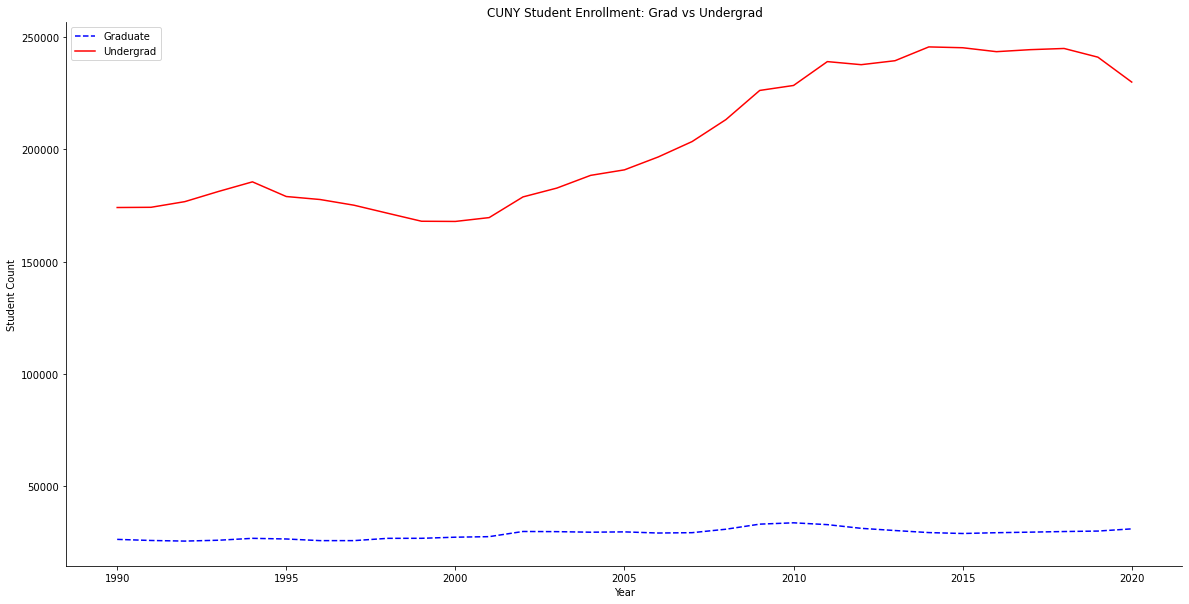

In [ ]:
#Van
#CUNY enrollment: Graduate vs Undergrad
grad = enrollment_df[enrollment_df["enrollment_type_description"] == "Graduate"]
undergrad = enrollment_df[enrollment_df["enrollment_type_description"] == "Undergraduate"]
fig, ax = plt.subplots()
grad_year_index = grad.groupby('fall_term')['head_count'].sum()
undergrad_year_index = undergrad.groupby('fall_term')['head_count'].sum()
#Grad line
ax.plot(grad_year_index, label='Graduate', color = "b", linestyle = "--")
ax.set_xlabel('Year')
ax.set_ylabel('Student Count')

#Undergrad line
ax.plot(undergrad_year_index, label='Undergrad', color = "r")
ax.set_title("CUNY Student Enrollment: Grad vs Undergrad")
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.set_size_inches(20,10)

plt.show()

C:\Users\rapha\AppData\Local\Temp/ipykernel_18156/4281885599.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\rapha\AppData\Local\Temp/ipykernel_18156/4281885599.py:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



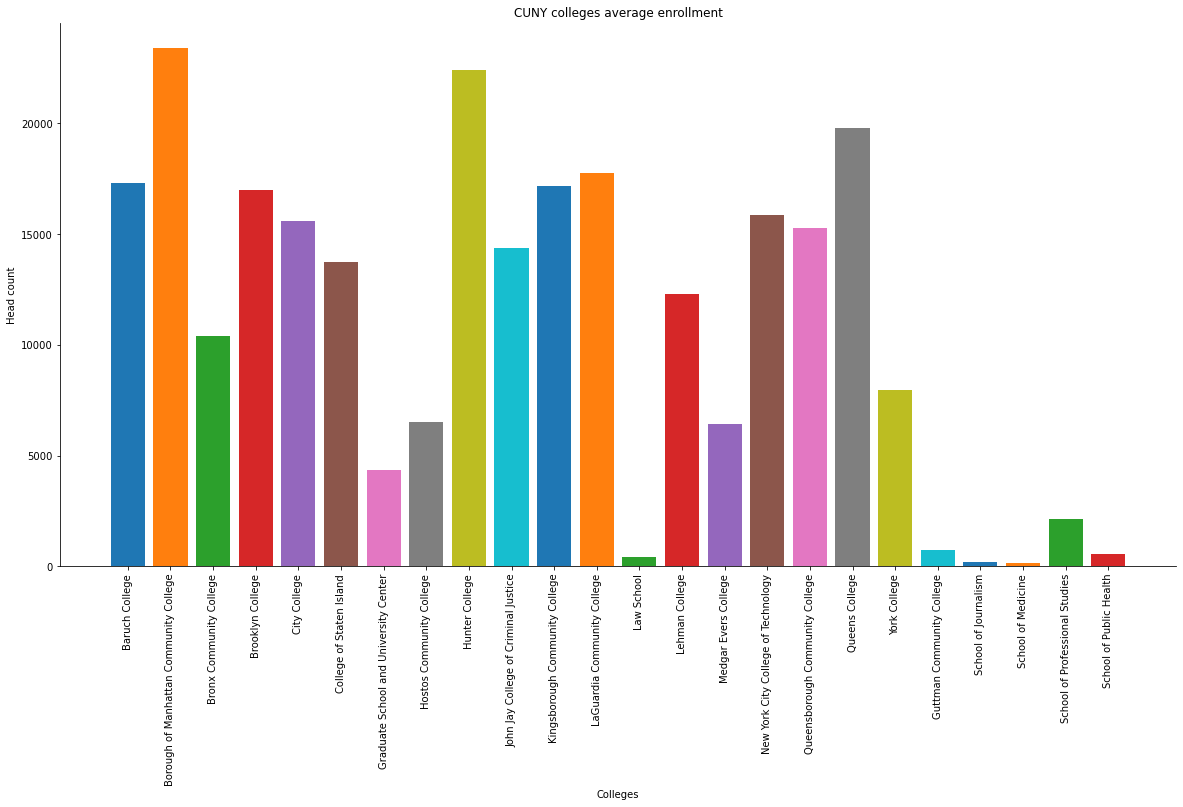

In [ ]:
#Van
#CUNY average enrollement by colleges
#Creating a sub data frame of Total enrollment by colleges
college_enrollment_df['head_count'] = college_enrollment_df['head_count'].astype(int)
total_college_enrollment_df = college_enrollment_df.loc[college_enrollment_df["enrollment_type_description"] == "Total"]
colleges = total_college_enrollment_df["college_name"].unique()
fig, ax = plt.subplots()
# Loop over the different colleges within CUNY
for college in colleges:
  # Extract the rows only for this college and total head count
  college_df = total_college_enrollment_df[college_enrollment_df["college_name"] == college]
  # Add a bar for the total "head_count" mean with std y error bar
  ax.bar(college, college_df["head_count"].mean())

ax.set_ylabel("Head count")
ax.set_xlabel("Colleges")
ax.set_xticklabels(colleges, rotation=90)
ax.set_title("CUNY colleges average enrollment")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.set_size_inches(20,10)

plt.show()

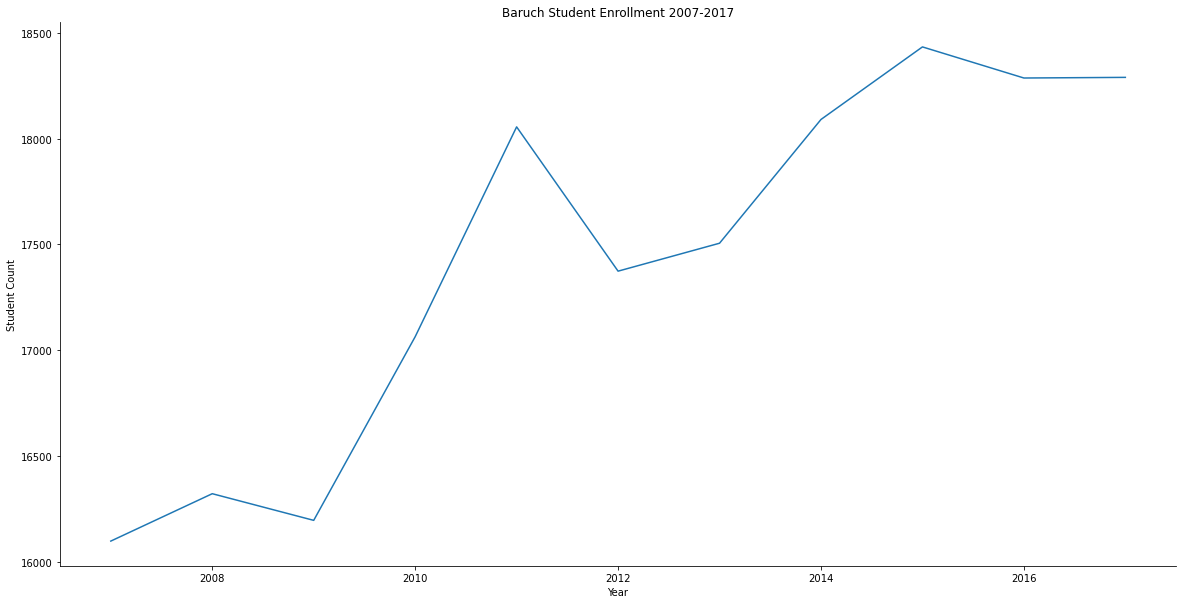

In [ ]:
#Van
#Plot for presentation
#Baruch enrollment overtime from 2007 - 2017
Baruch_enrollment = total_college_enrollment_df[total_college_enrollment_df["college_name"] == "Baruch College"]
Baruch_2007 = Baruch_enrollment[Baruch_enrollment["fall_term"] > 2000]

fig, ax = plt.subplots()

ax.plot(Baruch_2007["fall_term"], Baruch_2007["head_count"])

ax.set(xlabel='Year', ylabel='Student Count',
       title='Baruch Student Enrollment 2007-2017')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.set_size_inches(20,10)

plt.show()

C:\Users\rapha\AppData\Local\Temp/ipykernel_18156/1719078115.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



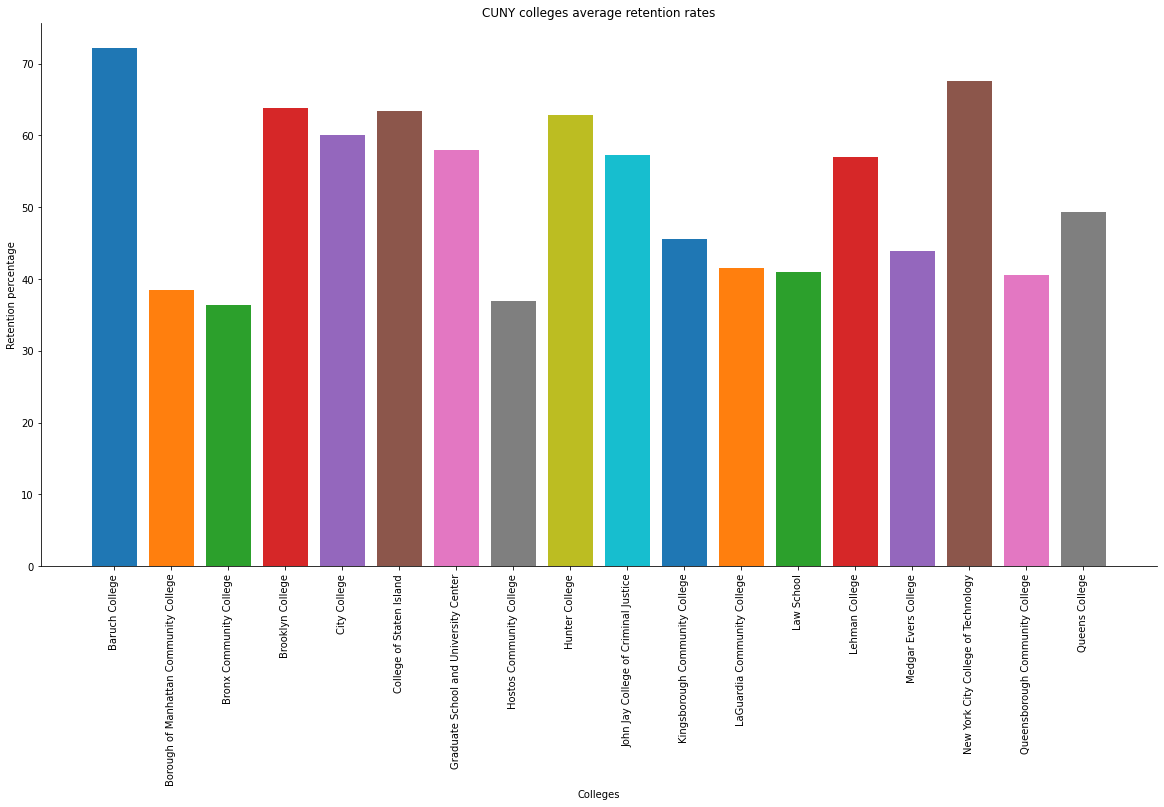

In [ ]:
#Ricky
#CUNY average retention rates by colleges
colleges_ret = retention_df["college"].unique()
fig, ax = plt.subplots()
# Loop over the different colleges within CUNY
for college in colleges_ret:
  # Extract the rows only for this college and total head count
  college_ret_df = retention_df[retention_df["college"] == college]
  # Add a bar for the total "head_count" mean with std y error bar
  ax.bar(college, college_ret_df["percentage"].mean())

ax.set_ylabel("Retention percentage")
ax.set_xlabel("Colleges")
ax.set_xticklabels(colleges, rotation=90)
ax.set_title("CUNY colleges average retention rates")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.set_size_inches(20,10)

plt.show()

C:\Users\rapha\AppData\Local\Temp/ipykernel_18156/1209620320.py:17: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.

C:\Users\rapha\AppData\Local\Temp/ipykernel_18156/1209620320.py:18: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



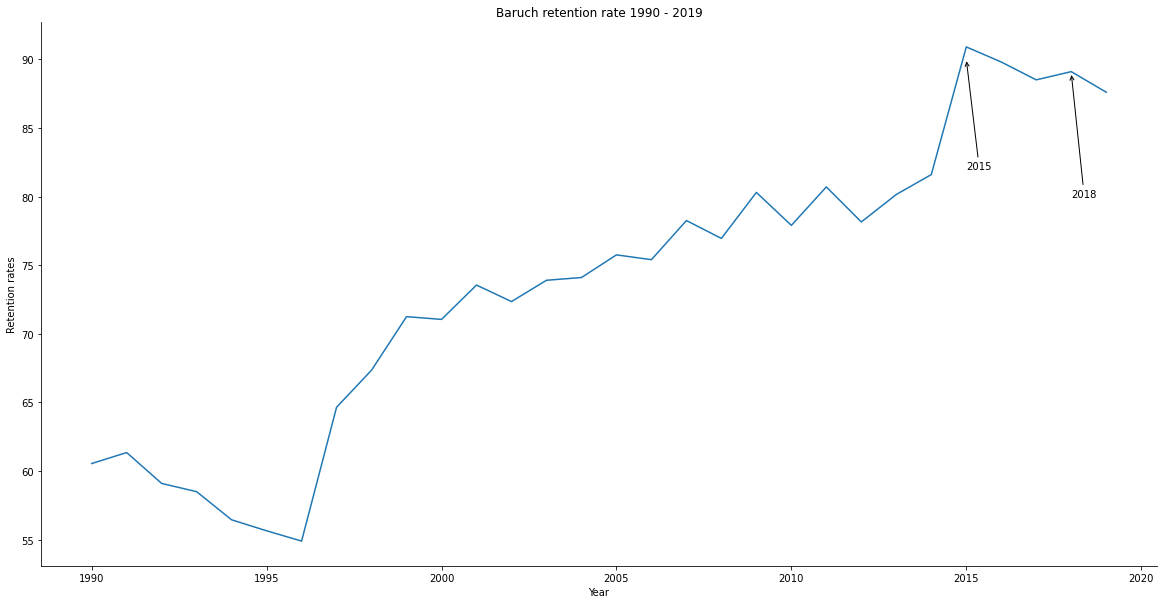

In [ ]:
#Plot for presentation Ricky
#Baruch retention rate
Baruch_ret_df = retention_df[retention_df["college"] == "Baruch College"]
Baruch_retention = Baruch_ret_df.groupby('fall_term')['percentage'].mean()

fig, ax = plt.subplots()

ax.plot(Baruch_retention)

ax.set(xlabel='Year', ylabel='Retention rates',
       title='Baruch retention rate 1990 - 2019')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# add annotation
plt.annotate(xy=[2015, 90], xytext=[2015, 82], s='2015', arrowprops = dict(arrowstyle="->"))
plt.annotate(xy=[2018, 89], xytext=[2018, 80], s='2018', arrowprops = dict(arrowstyle="->"))

fig.set_size_inches(20,10)

plt.show()



C:\Users\rapha\AppData\Local\Temp/ipykernel_18156/2887144412.py:15: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



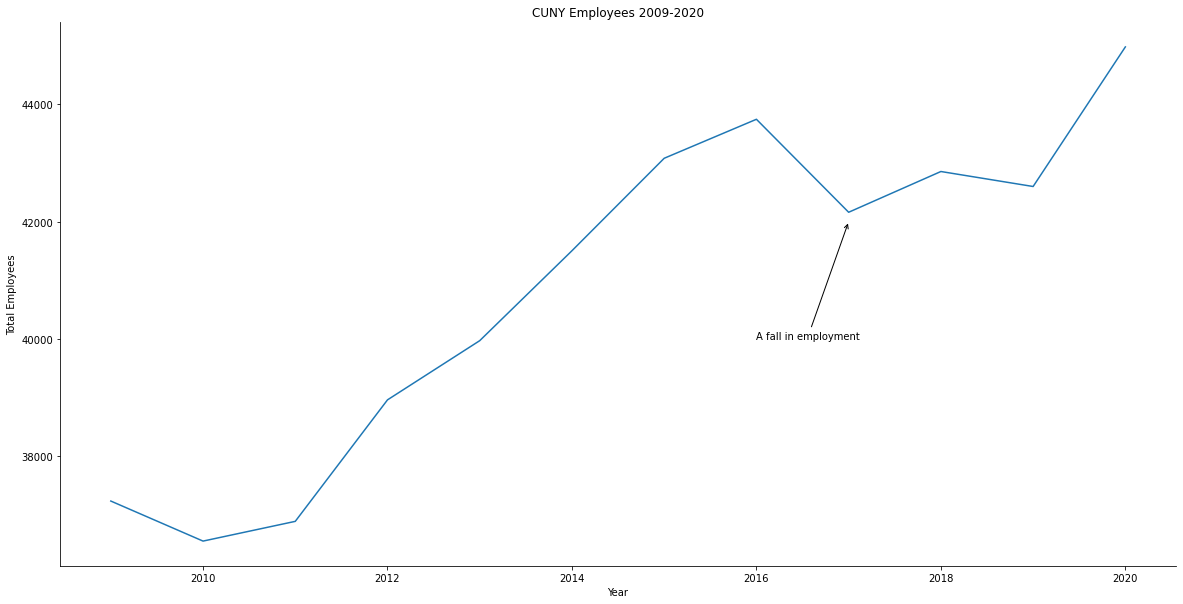

In [ ]:
#Plot for presentation Ricky
#Total CUNY Staff
employees = employee_df.groupby('year')['all_employees_total'].sum()

fig, ax = plt.subplots()

ax.plot(employees)

ax.set(xlabel='Year', ylabel='Total Employees',
       title='CUNY Employees 2009-2020')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# add annotation
ax.annotate(xy=(2017, 42000), xytext=(2016, 40000), s='A fall in employment', arrowprops = dict(arrowstyle="->"))

fig.set_size_inches(20,10)

plt.show()


C:\Users\rapha\AppData\Local\Temp/ipykernel_18156/886425019.py:15: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



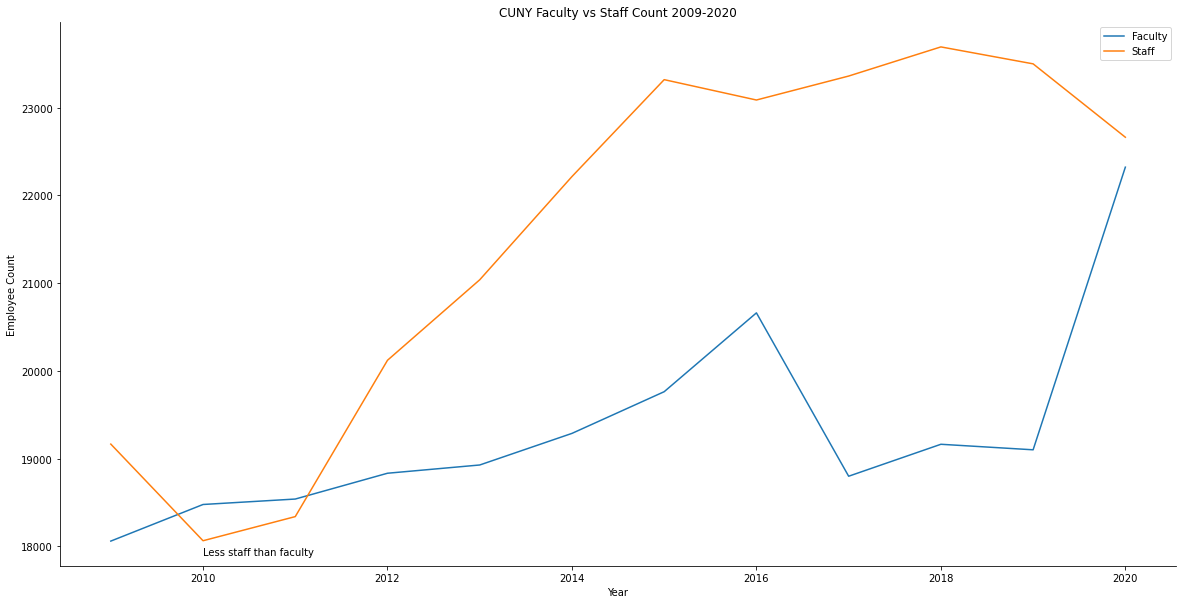

In [ ]:
#Plot for presentation Ricky
#CUNY Staff: Faculty vs Staff
facultyEmployees = employee_df.groupby('year')['faculty_total'].sum()
staffEmployees = employee_df.groupby('year')['staff_total'].sum()

fig, ax = plt.subplots()

ax.plot(facultyEmployees, label='Faculty')
ax.plot(staffEmployees, label='Staff')

ax.set(xlabel='Year', ylabel='Employee Count',
       title='CUNY Faculty vs Staff Count 2009-2020')
ax.legend()
# add annotation
plt.annotate(xy=[2010, 17900], s='Less staff than faculty')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.set_size_inches(20,10)

plt.show()

Conclusion: Based on the data it appears that more people think that a degree id worth it, despite what you may see in the news or on social media.  CUNY retention and graduation rates have gone up.  There has also been an increase in advanced degrees earned.  Therefore Anna Jay should surely consider attending college more. 